In [1]:
#!pip install tensorflow numpy matplotlib

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


2024-01-18 17:17:15.660999: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Function to generate synthetic time series data
def generate_time_series_data(total_points, time_step):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, total_points, 1)
    time = np.linspace(0, 1, time_step)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # wave 2
    series += 0.1 * (np.random.rand(total_points, time_step) - 0.5) # noise
    return series[..., np.newaxis]

# Generate synthetic time series data
time_step = 50
series = generate_time_series_data(10000, time_step)

# Split the data into training, validation, and testing sets
train_series = series[:7000]
val_series = series[7000:8500]
test_series = series[8500:]

# Function to create datasets (X, y) from time series
def create_dataset(series, n_steps):
    X, y = [], []
    for i in range(len(series) - n_steps):
        seq_x = series[i:(i + n_steps), 0]
        seq_y = series[i + n_steps, 0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y).reshape(-1, 1)

# Prepare input data
n_steps = 10
X_train, y_train = create_dataset(train_series, n_steps)
X_val, y_val = create_dataset(val_series, n_steps)
X_test, y_test = create_dataset(test_series, n_steps)

# Check the shape of the data
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (6990, 10, 1)
Shape of y_train: (6990, 1)


Epoch 1/20
219/219 [==============================] - 3s 6ms/step - loss: 0.1448 - val_loss: 0.1452
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1446 - val_loss: 0.1453
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1445 - val_loss: 0.1455
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1447 - val_loss: 0.1453
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1445 - val_loss: 0.1453
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1444 - val_loss: 0.1453
Epoch 7/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1446 - val_loss: 0.1453
Epoch 8/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1444 - val_loss: 0.1452
Epoch 9/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1445 - val_loss: 0.1452
Epoch 10/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1445 - val_loss: 0.1453

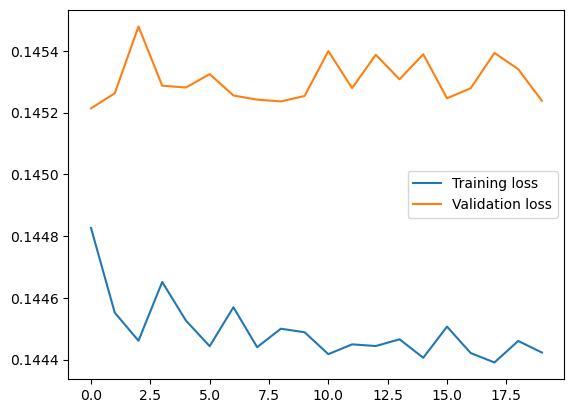

In [5]:

# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


# Evaluate the model
mse = model.evaluate(X_test, y_test)
print('Test MSE:', mse)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()
